# Лабораторная работа №5 
# Линейная регрессия. Градиентный спуск

**Выполнили студенты Зимин Андрей Валерьевич и Жилин Андрей Игоревич**

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import seaborn as sns
import datetime

In [2]:
# вспомогательная функция для вывода метрик
def print_metriks(y_true, y_pred, title=""):
    print(title)
    print(f'MSE: {mse(y_true, y_pred):.03f}')
    print(f'MAE: {mae(y_true, y_pred):.03f}')
    print(f'R^2: {r2(y_true, y_pred):.03f}')
    print()

## Чтение датасета
Задача: Загрузите из интернета данные о росте и весе 25000 подростков в возрасте 18 лет

In [3]:
df = pd.read_csv("./data/height_weight.csv", sep=";")
df['Height(Inches)'] = df['Height(Inches)'].apply(float)
df["Weight(Pounds)"] = df["Weight(Pounds)"].apply(float)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Данные загружены, импорт корректный

## Задание
Постройте гистограммы распределения обоих параметров, рассмотрев разбиение диапазона значений на 16 интервалов

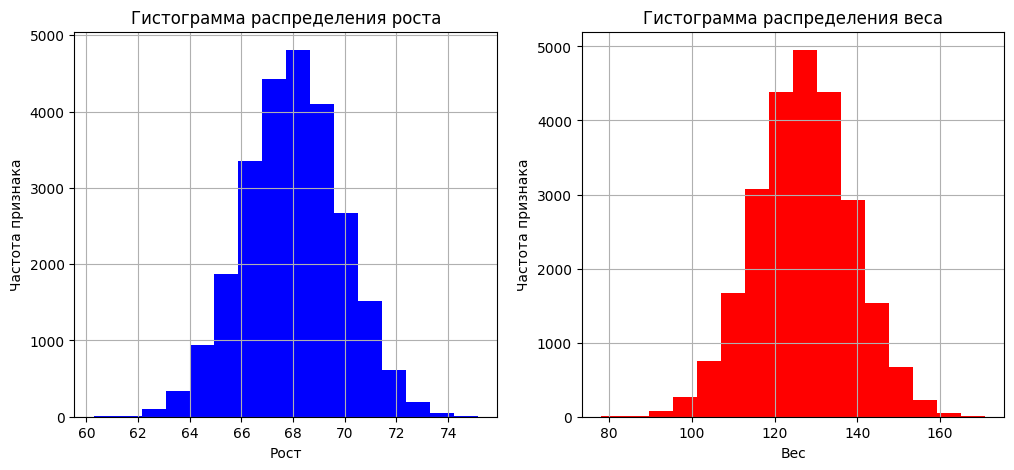

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['Height(Inches)'].hist(bins=16, ax=ax[0], color="blue")
df['Weight(Pounds)'].hist(bins=16, ax=ax[1], color="red")
ax[0].set_xlabel("Рост")
ax[0].set_ylabel("Частота признака")
ax[0].set_title("Гистограмма распределения роста")
ax[1].set_xlabel("Вес")
ax[1].set_ylabel("Частота признака")
ax[1].set_title("Гистограмма распределения веса")
print()

Визуально распределение признаков очень близко к нормальному распределению.

## Задание
Постройте диаграмму рассеяния (X-Y диаграмму) этих параметров.

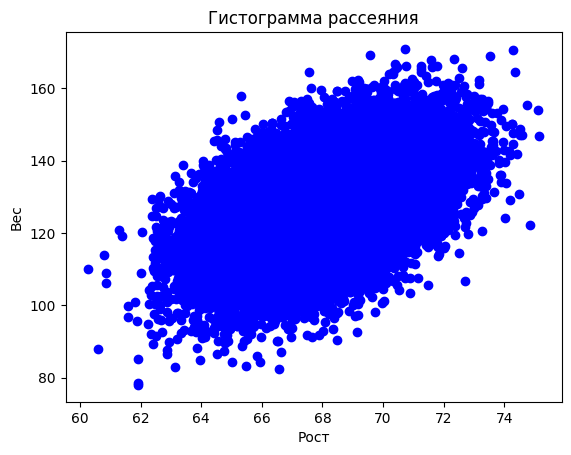

In [5]:
plt.scatter(df['Height(Inches)'], df['Weight(Pounds)'], color="Blue")
plt.xlabel('Рост')
plt.ylabel('Вес')
plt.title('Гистограмма рассеяния')
print()

Судя по диаграмме признаки явно коррелируют между собой. Также в данных нет выбросов.

## Задание
Вычислите коэффициент корреляции Пирсона между этими параметрами.

In [6]:
print(f"Коэффициент корреляции равен {df['Height(Inches)'].corr(df['Weight(Pounds)']):.02f}")

Коэффициент корреляции равен 0.50


Судя по абсолютной величине коэффициента корреляции, вес и рост имеют среднюю корреляцию.

## Задание
Используя МНК найдите коэффициенты линейной регрессии веса от роста. 

In [7]:
x = df["Height(Inches)"]
X = np.dstack([np.array(x), np.ones(len(x))])[0]
y = df["Weight(Pounds)"]
print("Преобразованный датасет:")
X[:5, :]

Преобразованный датасет:


array([[65.78331,  1.     ],
       [71.51521,  1.     ],
       [69.39874,  1.     ],
       [68.2166 ,  1.     ],
       [67.78781,  1.     ]])

Выделили признаки, добавили единичный столбец.

Оптимальные веса по методу наименьших квадратов:
$$w=(X^TX)^{-1}X^Ty$$

In [8]:
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
y_pred = np.dot(w, X.T)

print(f'Коэффициент наклона (w0): {w[0]:.02f}')
print(f'Коэфициент вертикального смещения (w1): {w[1]:.02f}')

Коэффициент наклона (w0): 3.08
Коэфициент вертикального смещения (w1): -82.58


Посчитали коэффициенты весов по МНК, теперь нужно посмотреть на распределение

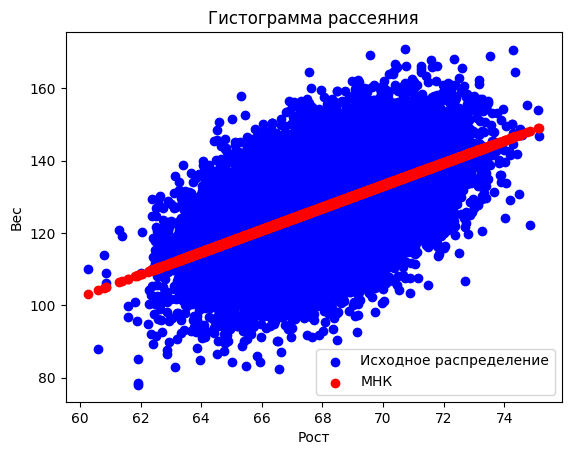

In [9]:
plt.scatter(x, y, color="Blue", label="Исходное распределение")
plt.scatter(x, y_pred, color="Red", label="МНК")
plt.xlabel('Рост')
plt.ylabel('Вес')
plt.title('Гистограмма рассеяния')
plt.legend()
print()

Судя по диаграмме получилось адекватное предсказание. Тенденция зависимости веса от роста определяется верно.

## Задание
Оцените качество регрессионной модели, используя оценки: среднеквадратическая ошибка MSE, средняя абсолютная ошибка MAE, коэффициент детерминации R2.

$$MSE = \frac{1}{n}\Sigma_{i=1}^{n}{(Y_i - \langle w, X_i \rangle)^2}$$
$$MAE = \frac{1}{n}\Sigma_{i=1}^{n}{(Y_i - \langle w, X_i \rangle)}$$
$$R^2 = 1 - \frac{\Sigma_{i=1}^{n}{(Y_i - \langle w, X_i \rangle)^2}}{\Sigma_{i=1}^{n}{(Y_i - \overline{Y})^2}}$$

In [10]:
print_metriks(y, y_pred, "Метод наименьших квадратов")

Метод наименьших квадратов
MSE: 101.589
MAE: 8.038
R^2: 0.253



Проще всего интерпретировать МАЕ - в среднем предсказание от действительного значения отличается на 8 фунтов ≈ 3,5 кг.  
Средний квадрат отклонения составляет 102 фунта в квадрате.  
Коэффициент детерминации = 0.253. Значит 25.3% изменчивости наблюдаемой переменной можно объяснить с помощью построенной модели.

## Задание
Реализуйте методы пакетного градиентного спуска с одним параметром и стохастического градиентного спуска. Величину ε для оценки точности выберите сами исходя из требования наличия не менее 100 итераций.

## Реализация градиентного спуска

Для градиентного спуска используют следующие формулы:

$$ a(X_i) = \langle w, X_i \rangle $$

$$ Q(a, X) = \frac{1}{n} \Sigma_{i=1}^{n}(a(X_i) - y_i)^2$$

$a(x)$ - функция получения предсказания для вектора-объекта и вектора-весов.  
$Q(a, X)$ - функционал ошибки

При этом градиент Q(a, X) можно посчитать двумя способами:  
1) По-определению $$\nabla_wQ = (\frac{dQ}{dw_1}, \frac{dQ}{dw_2}, ..., \frac{dQ}{dw_k})$$

2) Продифференцировать руками $$\nabla_wQ = \frac{2}{N}X^T(Xw - y)$$

Тогда имея веса модели $w^{(0)}$ как стартовое приближение, на $i+1$-вом шаге будем обновлять веса таким образом:

$$w^{(i+1)} = w^{(i)} - \alpha{\nabla_{w^{(i)}}Q}$$

При этом условие остановки, для некоторого заранее заданного $\epsilon$:

$$ \left\Vert {Xw^{(n)} - Xw^{(n-1)}} \right\|_2^2 < \epsilon $$


In [163]:
class GradientDescent:
    def __init__(self, train_x, train_y, h = 0.00005, eps=0.1, start_weights=None, logging=False, min_iterations=0):

        #часть за данные
        self.X = train_x #тренировочная выборка
        self.y = train_y #целевой признак
        self.strategy = ""

        #метаданные
        self.width = len(train_x[0]) + 1 #ширина тренировочной выборки
        self.height = len(train_x) #высота тренировочной выборки
        
        #модель 
        self.min_iterations = min_iterations
        self.h = h #шаг градиентного спуска h > 0
        self.eps = eps #точность градиентного спуска
        if not start_weights: #задание стартовых весов
            self.w = np.full(self.width, 1)
        self.X = np.concatenate((np.ones(self.height).reshape(-1, 1), self.X), axis=1) #фиктивная единица
        self.q = self.calc_q() # инизиализируем ошибку

        #логи
        self.logging = logging
        self.qs = np.array([]) #величина ошибки
        self.curr_timer = None
        self.timer = np.array([]) #массив для хранение время итераций

    def start_timer(self):
        self.curr_timer = datetime.datetime.now()
    
    def stop_timer(self):
        self.timer = np.append(self.timer, np.array(datetime.datetime.now() - self.curr_timer))

    def get_times(self):
        return self.timer
    
    def dq_dw0(self, X, y): #вычисление множителя dQ/dw_0, чтобы потом было удобно посчитать все производные
        dq = np.zeros(len(X))
        for i in range(len(X)):
            dq[i] = np.dot(self.w, X[i, :]) - y[i, 0] #скалярное произведение для каждого слагаемого(сумму саму не считаем, чтобы потом опять применить скалярное произведение)
        dq = dq * 2/self.height #домножаем на общий множитель
        return dq

    def grad(self, X = None, y = None): #вычисление градиента по пакету(подходит для mini-batch, package и stochastic)
        if X is None or y is None or np.size(X)==0 or np.size(y)==0:
            X = self.X
            y = self.y

        return (X.T.dot(X.dot(self.w) - y[:, 0]))*(2/self.height)

    def start_package_gradient_descent(self):
        self.strategy = "package"
        q = 2*self.q
        iteration_number = 0

        if self.logging:
            print("Величина ошибки на каждом шаге")

        while abs(self.q - q) > self.eps or iteration_number < self.min_iterations:
            
            self.start_timer()
            self.q = q
            self.w = self.w - self.h * self.grad()
            self.qs = np.append(self.qs, q) 
            q = self.calc_q()
            iteration_number += 1
            self.stop_timer()

            if self.logging:
                print(q)        
        return self.w

    def start_mini_batch_gradient_descent(self, batch_size = 1):
        self.start_timer()
        if batch_size == 1:
            self.strategy = "Stochastic"
        else:
            self.strategy = 'Mini-batch'


        # self.q = self.calc_q() #вычисляем ошибку сначала
        # idx = np.random.randint(self.height, size=batch_size)
        # self.w = self.w - self.h * self.grad(self.X[idx, :], self.y[idx, :]) #делаем шаг градиентного спуска
        # q = self.calc_q() #вычисляем ошибку после сделанного шага
        # self.stop_timer()
        iteration_number = 0
        q = 2*self.q
        if self.logging:
            print("Величина ошибки на каждом шаге")
        while abs(self.q - q) > self.eps or iteration_number < self.min_iterations: #объявляем цикл, для пакетного градиентного спуска
            
            self.start_timer()

            self.q = q #переприсваеваем значение ошибки 
            idx = np.random.randint(self.height, size=batch_size) # формируем индексы пакета
            self.w -= self.h * self.grad(self.X[idx, :], self.y[idx, :]) #вычисляем градиент по пакету и меняем веса
            self.qs = np.append(self.qs, q) #запоминаем значение ошибки
            q = self.calc_q() #вычисление значение ошибки после новых весов
            iteration_number += 1
            self.stop_timer()
            if self.logging:
                print(q) #логи
        return self.w

    def calc_q(self):
        q = 0
        for i in range(self.height):
            q += (np.dot(self.w, self.X[i]) - y[i])**2
        q = q/self.height
        return q

    def predict(self, X):
        X =  np.concatenate((np.ones(len(X)).reshape(-1, 1), X), axis=1) #фиктивная единица
        return np.dot(X, self.w).reshape(-1, 1)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

Импортируем реализованные методы, чтобы в дальнейшем сравнить их с нашей реализацией

In [164]:
""" SKLearn """
x = df[["Height(Inches)"]]
y = df[["Weight(Pounds)"]]

model = LinearRegression() #не забыть засечь время используя модуль time
model.fit(x, y)
sgd_grad_y_pred = model.predict(x)
print_metriks(y, sgd_grad_y_pred, "Пакетный градиентный спуск sklearn")

""" Наша реализация """
x = df[['Height(Inches)']].to_numpy()
y =  df[["Weight(Pounds)"]].to_numpy()

PGD = GradientDescent(x, y, logging=True, min_iterations=100) 
PGD.start_package_gradient_descent()
package_grad_y_pred = PGD.predict(x)
print_metriks(y, package_grad_y_pred, "Наш пакетный градиентный спуск")

Пакетный градиентный спуск sklearn
MSE: 101.589
MAE: 8.038
R^2: 0.253

Величина ошибки на каждом шаге
[1083.80784892]
[388.95994673]
[188.41410196]
[130.53289367]
[113.82731514]
[109.00577828]
[107.61419373]
[107.21255631]
[107.09663578]
[107.06317839]
[107.05352136]
[107.05073356]
[107.04992834]
[107.04969533]
[107.04962747]
[107.04960728]
[107.04960085]
[107.04959838]
[107.04959707]
[107.04959608]
[107.04959519]
[107.04959432]
[107.04959346]
[107.04959261]
[107.04959176]
[107.0495909]
[107.04959005]
[107.04958919]
[107.04958834]
[107.04958749]
[107.04958663]
[107.04958578]
[107.04958493]
[107.04958407]
[107.04958322]
[107.04958237]
[107.04958151]
[107.04958066]
[107.04957981]
[107.04957895]
[107.0495781]
[107.04957725]
[107.04957639]
[107.04957554]
[107.04957469]
[107.04957383]
[107.04957298]
[107.04957213]
[107.04957127]
[107.04957042]
[107.04956956]
[107.04956871]
[107.04956786]
[107.049567]
[107.04956615]
[107.0495653]
[107.04956444]
[107.04956359]
[107.04956274]
[107.04956188]
[1

У модели sklearn метрики лучше чем у нашей реализации

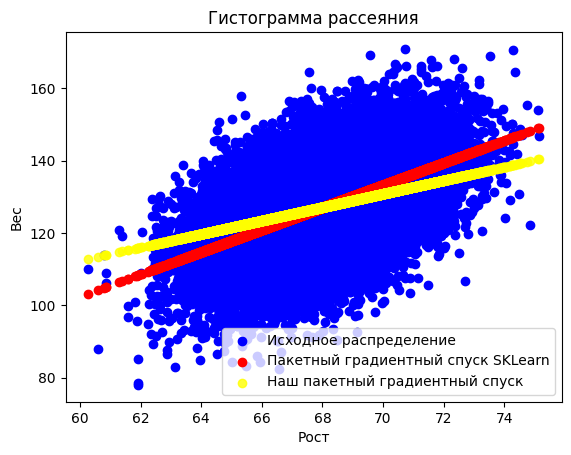

In [165]:
plt.scatter(df["Height(Inches)"], df["Weight(Pounds)"], color='Blue', label="Исходное распределение")
plt.scatter(df['Height(Inches)'], sgd_grad_y_pred, color="Red", label="Пакетный градиентный спуск SKLearn")
plt.scatter(df["Height(Inches)"], package_grad_y_pred, color="Yellow", label="Наш пакетный градиентный спуск", alpha = 0.8)

plt.xlabel('Рост')
plt.ylabel('Вес')
plt.title('Гистограмма рассеяния')
plt.legend()
print()

Визуально модель SKLearn кажется более оптимальной, чем наша модель. Наша модель сошлась к некоторому минимому, но к другому, отличному от оптимального. 

In [33]:
df["Weight(Pounds)"].head()

0    112.9925
1    136.4873
2    153.0269
3    142.3354
4    144.2971
Name: Weight(Pounds), dtype: float64

In [21]:
model = LinearRegression()
model.fit(x, y)
grad_y_pred = model.predict(x) #не забыть засечь время используя модуль time
print(model.coef_, model.intercept_)

[[3.08347645]] [-82.57574306]


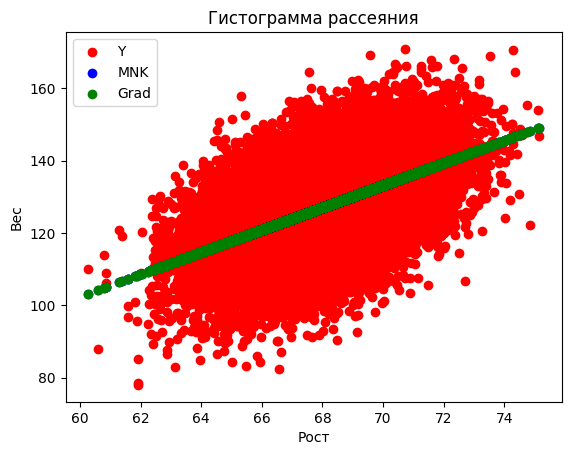

In [56]:
plt.scatter(x["Height(Inches)"], y, color='Red', label="Y")
plt.scatter(x['Height(Inches)'], y_pred, color="Blue", label="MNK")
plt.scatter(x["Height(Inches)"], grad_y_pred, color="Green", label="Grad")
#plt.scatter(x["Height(Inches)"], sgd_grad_y_pred, color="Yellow", label="Stohastic")
plt.xlabel('Рост')
plt.ylabel('Вес')
plt.title('Гистограмма рассеяния')
plt.legend()

In [57]:
print_metriks(y.values, grad_y_pred, "Пакетный градиентный спуск")
print_metriks(y.values, sgd_grad_y_pred, "Стохастический градиентный спуск")

Пакетный градиентный спуск
MSE: 101.589
MAE: 8.038
R^2: 0.253

Стохастический градиентный спуск
MSE: 26030543681616380.000
MAE: 140958172.864
R^2: -191441747809426.188



## Задание
Рассматривая вес как результативный признак (y), а рост как факторный признак ($ x_0 $), сформируйте ещё 6 штук факторных признаков типа (фантазируйте!):

y - Weight(Pounds) - целевой признак

$ x_0 $ - Height(Inches) - факторный признак


Были добавлены следующие признаки

$
x_1 = (x_0 - \overline{x_0})^{2} \\

x_2 = x_0^{2} - 5 \\

x_3 = (x_0 + \log_2{x_0})^{2} \\

x_4 = \log(x_9) \\

x_5 = \log_2^{2}{x_0} + \log_2^{3}{x_0} \\

x_6 = x_0 \log_2{x_0} \\

x_7 = \sin(x_0) \\

x_8 = \cos(x_0) \\

x_9 = \exp(\cos(x_0) + \sin(x_0)) \\

x_{10} = x_0 \sin(x_0) \\
$

In [121]:
x0 = df['Height(Inches)']




df['x0^2 - x0_mean'] =  (x0 - np.full(len(x0), - x0.mean()))**2
df['x0^2 - 5'] = x0**2 - np.full(len(x0), 5)
df['(x0 + log2(x0))^2'] = (x0 + np.log2(x0))**2
df['log2(x0)'] = np.log2(x0)
df['log2(x0)^2 + log2(x0)^3'] = np.log(x0)**2 + np.log(x0)**3
df['x0*log2(x0)'] = x0*np.log2(x0)
df['sin(x0)'] = np.sin(x0)
df['cos(x0)'] = np.cos(x0)
df['exp(cos(x0) + sin(x0)'] = np.exp(np.cos(x0) + np.sin(x0))
df['x1 * sin(x1)'] = x0 * np.sin(x0)

df

,Height(Inches),Weight(Pounds),x0^2 - x0_mean,x0^2 - 5,(x0 + log2(x0))^2,log2(x0),log2(x0)^2 + log2(x0)^3,x0*log2(x0),sin(x0),cos(x0),exp(cos(x0) + sin(x0),x1 * sin(x1)
1,65.78331,112.9925,17896.131510,4322.443875,5158.537540,6.039650,90.894498,397.308148,0.188992,-0.981979,0.452491,12.432531
2,71.51521,136.4873,19462.572353,5109.425261,6033.465933,6.160178,96.081701,440.546438,0.675337,-0.737510,0.939720,48.296840
3,69.39874,153.0269,18876.521435,4811.185114,5702.602455,6.116838,94.194430,424.500820,0.279911,0.960026,3.455396,19.425485
4,68.21660,142.3354,18553.086078,4648.504516,5521.775605,6.092051,93.126236,415.579003,-0.782355,0.622832,0.852551,-53.369614
5,67.78781,144.2971,18436.459213,4590.187185,5456.889768,6.082954,92.736222,412.350127,-0.970484,0.241167,0.482238,-65.786964
...,...,...,...,...,...,...,...,...,...,...,...,...
24996,69.50215,118.0312,18904.947512,4825.548855,5718.556165,6.118986,94.287386,425.282662,0.377515,0.926003,3.682230,26.238128
24997,64.54826,120.1932,17567.215715,4161.477869,4978.793517,6.012306,89.744182,388.083910,0.989417,-0.145097,2.326397,63.865178
24998,64.69855,118.2655,17607.077588,4180.902372,5000.499704,6.015661,89.884809,389.204575,0.956540,-0.291601,1.944371,61.886745
24999,67.52918,132.2682,18366.292062,4555.190151,5417.934380,6.077439,92.500314,410.404481,-0.999887,-0.015061,0.362421,-67.521520


In [56]:
sns.pairplot(df)

In [57]:
sns.heatmap(df.corr())

<Axes: xlabel='0', ylabel='0'>

In [58]:
sns.heatmap(df.corr(method='spearman'))

<Axes: xlabel='0', ylabel='0'>

In [59]:
sns.heatmap(df.corr(method='kendall'))

<Axes: xlabel='0', ylabel='0'>

In [82]:
model = LinearRegression()

features_df = df.drop(columns='Weight(Pounds)')
target_df = df[['Weight(Pounds)']]

model.fit(features_df, target_df) #не забыть засечь время используя модуль time

grad_y_pred = model.predict(features_df) 

for i, x in enumerate(model.coef_[0]):
    print(f"x_{i} = ", x)
print("b = ", *model.intercept_)

x_0 =  13833784.105929334
x_1 =  6009985.421438542
x_2 =  -2115961559.4207542
x_3 =  2110048705.1493323
x_4 =  -7800972498.915369
x_5 =  -691399982.1869586
x_6 =  -4299107825.927179
x_7 =  -54.448628188238956
x_8 =  3.35375634525531
x_9 =  0.11081812504727317
x_10 =  0.7990848948634803
b =  -29075730714.655155


In [61]:
print(f'R^2: {r2_score(y.values, grad_y_pred):.03f}')
print(f'MSE: {mean_squared_error(y.values, grad_y_pred):.03f}')
print(f'MAE: {mean_absolute_error(y.values, grad_y_pred):.03f}')

R^2: 0.253
MSE: 101.542
MAE: 8.036


In [73]:
plt.scatter(x0, y, c=["#a6bdd7"])
plt.scatter(x["Height(Inches)"], grad_y_pred, color="Green", label="Grad")

Задание написать пакетный градиентный спуск

In [24]:
plt.scatter(x, y, c=["#a6bdd7"])
plt.scatter(x, pred_y, color="Green", label="Grad")




In [25]:
PSD = GradientDescent(x, y, 0.75, 0.1) #инизиализируем стохастический градиентный спуск

In [26]:
PSD.start_mini_batch_gradient_descent() #стохастический так как размер пакета 1 это эквивалентно стохастическому

[1320.75346615]
[786.15771815]
[455.34026892]
[201.68176963]
[159.88133783]
[112.05140407]
[111.9348183]
[107.07279064]
[107.84237499]
[130.61306852]
[135.13552423]
[164.94186025]
[185.99153793]
[132.68519635]
[139.98303898]
[126.78459886]
[156.4169193]
[107.1490816]
[108.42297689]
[108.44567096]


array([1.01235755, 1.83770519])

In [27]:
pred_y = PSD.predict(x)
print(f'R^2: {r2_score(y, pred_y):.03f}')
print(f'MSE: {mean_squared_error(y, pred_y):.03f}')
print(f'MAE: {mean_absolute_error(y, pred_y):.03f}')

R^2: 0.202
MSE: 108.446
MAE: 8.297


In [28]:
PMBGD = GradientDescent(x, y, 0.01, 0.1) #здесь будет mini-batch

In [29]:
PMBGD.start_mini_batch_gradient_descent(batch_size=100)#размер батча 100 метод мини-батч

[649.50101413]
[313.33335238]
[187.89747954]
[136.9134807]
[117.97476849]
[112.46102127]
[108.87937253]
[107.79792507]
[107.30035737]
[107.11141868]
[107.06920365]


array([1.01249473, 1.85301581])

In [30]:
pred_y = PMBGD.predict(x)
print(f'R^2: {r2_score(y, pred_y):.03f}')
print(f'MSE: {mean_squared_error(y, pred_y):.03f}')
print(f'MAE: {mean_absolute_error(y, pred_y):.03f}')

R^2: 0.213
MSE: 107.069
MAE: 8.245


In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

df_err = pd.DataFrame(PSD.qs, columns=[PSD.strategy])
df_err.plot(ax=ax)

df_err = pd.DataFrame(PGD.qs, columns=[PGD.strategy])
df_err.plot(ax=ax, color='red')

df_err = pd.DataFrame(PMBGD.qs, columns=[PMBGD.strategy])
df_err.plot(ax=ax, color='orange')

ax.set_title('Сходимость')
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Величина ошибки")

Text(0, 0.5, 'Величина ошибки')

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

df_err = pd.DataFrame(PSD.get_times()[1:], columns=[PSD.strategy])
df_err.plot(ax=ax)

df_err = pd.DataFrame(PGD.get_times()[1:], columns=[PGD.strategy])
df_err.plot(ax=ax, color='red')

df_err = pd.DataFrame(PMBGD.get_times()[1:], columns=[PMBGD.strategy]) #используем логарифмическую шкалу(возможно не стоит)
df_err.plot(ax=ax, color='orange')

ax.set_title('Скорость работы разных методов')
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Время")

Text(0, 0.5, 'Время')